# Trabajo 1 Metodos Estadísticos

In [31]:
#son necesarios 4 paquetes
# es necesario instalarlos antes de cargarlos.
library(car)
library(leaps)
library(perturb)
library(tseries)
library(IRdisplay)
display_html(
'<script>  
code_show=true; 
function code_toggle() {
  if (code_show){
    $(\'div.input\').hide();
  } else {
    $(\'div.input\').show();
  }
  code_show = !code_show
}  
$( document ).ready(code_toggle);
</script>
  <form action="javascript:code_toggle()">
    <input type="submit" value="Pulse el botón para ver el código.">
 </form>'
)

## Integrantes: 

## Enunciado: 

1. Estime un modelo de regresión lineal múltiple que explique el precio de venta de las casas en términos de todas las
variables predictoras. Analice la signifícancia de la regresión y de los parámetros individuales. Calcule e interprete el
coefíciente de determinación múltiple R2. Comente los resultados.
2. Probar la significancia simultánea del subconjunto de tres variables con los valores p mayores del punto anterior. Según el resultado de la prueba es posible descartar del modelo las variables del subconjunto?.
3. Use la información pertinente para determinar si la multicolinealidad es un problema potencial.
4. Usando el método backward determine cuales son las predictoras que deben estar en el modelo. ¿ Concuerda este modelo con el determinado en primer inciso? Además use los otros criterios vistos en clase para mostrar 2 candidatos a mejor modelo. Argumente.
5. Realice una validación de los supuestos en los errores y examine si hay valores atípicos, de balanceo e influyentes. Qué puede decir acerca de la validez de éste modelo?. Argumente.

In [32]:
#lee el archivo .txt
datos<-read.table(file.choose(), header=T )
#CARGA BASE DE DATOS Y NOMBRES DE VARIABLES EN R
attach(datos)
#muestra datos
datos


The following objects are masked from datos (pos = 3):

    X1, X2, X3, X4, X5, Y

The following objects are masked from datos (pos = 4):

    X1, X2, X3, X4, X5, Y



Y,X1,X2,X3,X4,X5
34.7,6.506,6.204,1.392,5,37
40.6,9.200,7.980,2.000,5,30
28.9,5.604,9.520,1.501,6,32
31.0,6.271,6.520,0.975,6,28
25.9,4.918,3.472,0.998,7,42
25.9,3.891,2.275,0.567,4,3
25.9,4.557,4.050,1.232,6,54
30.9,5.898,5.850,1.240,7,51
29.5,5.858,4.587,1.101,5,45
27.9,4.543,2.275,1.175,6,40


### 1. Estime un modelo de regresión lineal múltiple que explique el precio de venta de las casas en términos de todas las variables predictoras. Analice la signifícancia de la regresión y de los parámetros individuales. Calcule e interprete el coefíciente de determinación múltiple R2. Comente los resultados.


Si se quiere estimar un modelo de regresion lineal multiple que explique el precio de venta de las casas en terminos de las variables predictoras $$Y = \beta_0+\beta_1X_1+\beta_2X_2+\beta_3X_3+\beta_4X_4+\beta_5X_5+E$$

In [33]:
#AJUSTE DEL MODELO
modelo<-lm(Y~X1+X2+X3+X4+X5)

summary(modelo)
#nrow(datos) nro. de datos.



Call:
lm(formula = Y ~ X1 + X2 + X3 + X4 + X5)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.9255 -2.1451  0.1387  1.5355  5.9562 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  8.963411   3.863012   2.320   0.0291 *  
X1           3.107643   0.537314   5.784 5.81e-06 ***
X2          -0.112221   0.414986  -0.270   0.7891    
X3           1.879014   0.880188   2.135   0.0432 *  
X4           0.598985   0.712458   0.841   0.4088    
X5          -0.002084   0.041069  -0.051   0.9599    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.188 on 24 degrees of freedom
Multiple R-squared:  0.8267,	Adjusted R-squared:  0.7906 
F-statistic: 22.89 on 5 and 24 DF,  p-value: 2.052e-08



En este modelo el parametro $\beta_0$ no tiene interpretación estadistica ya que el vector nulo no se encuentra en el conjunto de datos recolectados.

## hipotesis a evaluar: 

$ H_o : \beta_1=\beta_2=\beta_3=\beta_4=\beta_5=0 $

$ Ha: B_k \neq 0$


De lo anterior se puede concluir que:

$$P_{value} < \alpha $$

$$2.05x10^{-8} < 0.05$$

además: $F_{0.05,5,24} = 2.621$ y $F_0 = 22.894$ por lo tanto $F_{0.05,5,24} < F_0$ por todo lo anterior, se rechaza la hipotesis nula y se toma la hipotesis alternativa lo que quiere decir que existe por lo menos un $B_k$ que ayude a explicar el modelo.

Ahora se estudiará la significancia individual para cada parametro.

In [34]:
#PARA OBTENER LA ANOVA DEL MODELO DE RLM CREAMOS LA SIGUIENTE FUNCI?N
miAnova<-function(modeloreg){
  SSq<-unlist(anova(modeloreg)["Sum Sq"])
  k<-length(SSq)-1
  SSR<-sum(SSq[1:k])
  SSE<-SSq[(k+1)]
  MSR<-SSR/k
  df.error<-unlist(anova(modeloreg)["Df"])[k+1]
  MSE<-SSE/df.error
  F0<-MSR/MSE
  VP<-pf(F0,k,df.error,lower.tail=F)
  result<-
    data.frame(SumSq=c(SSR,SSE),Df=c(k,df.error),MeanSq=c(MSR,MSE),F0=c(round(F0,digits=3),' '),
               P.value=c(format(VP,scientific = TRUE,digits=3),' '),row.names =c("Modelo","Error"))
  cat("Tabla ANOVA Modelo de Regresi?n","\n")
  result
}

miAnova(modelo)

Tabla ANOVA Modelo de Regresi?n 


,SumSq,Df,MeanSq,F0,P.value
Modelo,1163.5619,5,232.7124,22.894,2.05e-08
Error,243.9527,24,10.1647,,


## Pruebas de significancia individual:

* para $\beta_1$: 
$$H_0: \beta_1 =0$$
  $$H_1: \beta_1 \neq 0$$

* para $\beta_2$:  
$$H_0: \beta_2 =0$$
  $$H_1: \beta_2 \neq 0$$

* para $\beta_3$:
$$H_0: \beta_3 =0$$
  $$H_1: \beta_3 \neq 0$$

* para $\beta_4$:
$$H_0: \beta_4 =0$$
  $$H_1: \beta_4 \neq 0$$

* para $\beta_5$:
$$H_0: \beta_5 =0$$
  $$H_1: \beta_5 \neq 0$$
  
  como nuestro $\alpha = 0.05$ es posible realizar pruebas usando el resumen del modelo generado por R:

In [35]:
#AJUSTE DEL MODELO
modelo<-lm(Y~X1+X2+X3+X4+X5)
print("Modelo: ")
summary(modelo)


[1] "Modelo: "



Call:
lm(formula = Y ~ X1 + X2 + X3 + X4 + X5)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.9255 -2.1451  0.1387  1.5355  5.9562 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  8.963411   3.863012   2.320   0.0291 *  
X1           3.107643   0.537314   5.784 5.81e-06 ***
X2          -0.112221   0.414986  -0.270   0.7891    
X3           1.879014   0.880188   2.135   0.0432 *  
X4           0.598985   0.712458   0.841   0.4088    
X5          -0.002084   0.041069  -0.051   0.9599    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.188 on 24 degrees of freedom
Multiple R-squared:  0.8267,	Adjusted R-squared:  0.7906 
F-statistic: 22.89 on 5 and 24 DF,  p-value: 2.052e-08


si Pr(>|t|) $> \alpha$ no rechaza la hipotesis nula y se elimina el parametro del modelo:

en $X_1: Pr=5.81x10^{-6} < 0.05$ por lo tanto $H_0$  se rechaza 


en $X_2: Pr=0.7891 > 0.05$ por lo tanto no se rechaza $H_0$ y se eliminará el parametro del modelo 


en $X_3: Pr=0.0432< 0.05$ por lo tanto se rechaza $H_0$  


en $X_4: Pr=0.4088 > 0.05$ por lo tanto  no se rechaza $H_0$ y se eliminará el parametro del modelo 

en $X_5: Pr=0.9599 > 0.05$ por lo tanto no se rechaza $H_0$ y se eliminará el parametro del modelo 

Luego, el modelo contará con los parametros $\beta_1$ y $\beta_3$.

$$Y \sim (\beta_1X_1+\beta_3X_3)$$

Además, de la tabla ANOVA del Modelo de Regresion (que ya ha sido mostrada anteriormente) se obtiene el valor de $\text{R}^2$ realizando el cociente entre la SumSq del modelo y la SumSq Total definida como la suma entre la SumSq del modelo y la SumSq del error, asi obtenermos que $\text{R}^2 = 0.8267$ por tanto se afirma que el $82\%$ de la vadiabilidad de los datos es explicada por el modelo.
(Nota: Para mayor facilidad el $\text{R}^2$ tambien puede ser obtenido a partir de la tabla anterior, se encuentra como "Multiple R-squared".)



### 2. Probar la significancia simultánea del subconjunto de tres variables con los valores p mayores del punto anterior. Según el resultado de la prueba es posible descartar del modelo las variables del subconjunto?.

In [36]:
#TABLA DE TODAS LAS REGRESIONES POSIBLES
allregtable<-function(modeloreg,respuesta){
  t1<-summary(regsubsets(model.matrix(modeloreg)[,-1],respuesta,nbest=20),all.best=TRUE)
  t2<-as.vector(apply(t1$which[,-1],1,sum))
  t3<-apply(t1$which[,-1],1,function(x) as.character(paste(colnames(
    model.matrix(modeloreg)[,-1])[x],collapse=" ")))
  results<-data.frame(NoOfVars=t2,R2=round(t1$rsq,4),adjR2=round(t1$adjr2,4),
                      SSE=round(t1$rss,5),Cp=round(t1$cp,4),
                      #MSE=round(t1$rss/(nrow(model.matrix(modeloreg)[,-1])-(t2+1)),5),
                      Variables.in.model=t3)
  results
}
allregtable(modelo,Y)

NoOfVars,R2,adjR2,SSE,Cp,Variables.in.model
1,0.7678,0.7595,326.7691,6.1475,X1
1,0.3718,0.3494,884.1864,60.9860,X3
1,0.3695,0.3470,887.4472,61.3068,X2
1,0.3031,0.2782,980.9188,70.5025,X4
1,0.0011,-0.0346,1405.9970,112.3216,X5
2,0.8197,0.8063,253.8342,0.9721,X1 X3
2,0.7888,0.7732,297.2065,5.2391,X1 X4
2,0.7778,0.7613,312.7945,6.7726,X1 X5
2,0.7692,0.7521,324.8155,7.9553,X1 X2
2,0.5362,0.5018,652.8124,40.2235,X2 X4


para este punto se toma la siguiente prueba de hipotesis: 
$$H_0: \beta_2 = \beta_4= \beta_5 =0$$
$$H_1: \beta_2 \neq 0 \vee \beta_4 \neq 0 \vee \beta_5 \neq 0 $$
De las tablas anteriores se obtiene que el valor de $F_*$ se define como sigue:
$$F_* = \frac{ \frac{253.8342 - 243.9527}{3}}{\frac{243.9527}{24}} = 0.3248$$

de la tabla de fisher se obtiene el valor de $F_{0.05,3,24}= 3.009$ y se concluye $$F_* < F_{0.05,3,24}$$
No se tienen argumentos para rechazar la hipotesis nula, por lo tanto se concluye que ninguno de los parametros enunciados es significtivo.

### 3. Use la información pertinente para determinar si la multicolinealidad es un problema potencial.

In [37]:
##################################
##PARA EVALUAR MULTICOLINEALIDAD##
##################################


#CREANDO FUNCIÓN PARA EXTRAER COEFICIENTES ESTIMADOS, SUS IC DEL 95%, VIF'S Y COEFICIENTES ESTANDARIZADOS
miscoeficientes=function(modeloreg,datosreg){
  coefi=coef(modeloreg)
  datos2=as.data.frame(scale(datosreg))
  coef.std=c(0,coef(lm(update(formula(modeloreg),~.+0),datos2)))
  limites=confint(modeloreg,level=0.95)
  vifs=c(0,vif(modeloreg))
  resul=data.frame(Estimacion=coefi,Limites=limites,Vif=vifs,Coef.Std=coef.std)
  cat("Coeficientes estimados, sus I.C, Vifs y Coeficientes estimados estandarizados","\n")
  resul
}
#CREANDO FUNCION PARA EXTRAER RESULTADOS PARA DIAGN?STICOS DE MULTICOLINEALIDAD
misDiagnostcolin=function(modeloreg,centrar=F){
  if(centrar==F){
    X=model.matrix(modeloreg)
    val.prop=prcomp(X,center=FALSE,scale=TRUE)$sdev^2
    Ind=colldiag(modeloreg)
    resul=data.frame(Val.propio=val.prop,Ind.Cond=Ind$condindx,Pi=Ind$pi)
    cat("Diagnósticos Multicolinealidad - Intercepto incluido","\n",
        "Indices de Condición y Proporciones de Varianza","\n")
  }
  else{
    X=model.matrix(modeloreg)[,-1]
    val.prop=prcomp(X,center=TRUE,scale=TRUE)$sdev^2
    Ind=colldiag(modeloreg,center=TRUE,scale=TRUE)
    resul=data.frame(Val.propio=val.prop,Ind.Cond=Ind$condindx,Pi=Ind$pi)
    cat("DiagnÓsticos Multicolinealidad - Intercepto ajustado","\n",
        "Índices de Condición y Proporciones de Varianza","\n")
  }
  resul
}


#misDiagnostcolin(modelo)
#misDiagnostcolin(modelo,centrar=T)

#MATRIZ DE CORRELACIÓN
#plot(datos)


Para estudiar la multicolinealidad del modelo, primero se utiliza el metodo de factor de inflación de varianza, para el cual se obtiene la siguiente tabla:

In [38]:
miscoeficientes(modelo,datos)

Coeficientes estimados, sus I.C, Vifs y Coeficientes estimados estandarizados 


,Estimacion,Limites.2.5..,Limites.97.5..,Vif,Coef.Std
(Intercept),8.963411230,0.99054583,16.9362766,0.000000,0.000000000
X1,3.107643417,1.99868108,4.2166058,2.274322,0.741224000
X2,-0.112221005,-0.96870994,0.7442679,2.152043,-0.033712193
X3,1.879014357,0.06239572,3.6956330,1.767142,0.241163276
X4,0.598984615,-0.87145558,2.0694248,1.666236,0.092224352
X5,-0.002084124,-0.08684715,0.0826789,1.314460,-0.004944245


para analizarla se tiene en cuenta la definición del factor de inflación de varianza $VIF_j$ 
$$VIF_j =\frac{1}{1 − R^2_j}$$

y se tienen en cuenta las siguientes consideraciones: 
* Si $VIF_j ≤ 5$, no hay o presentan una leve multicolinealidad en el modelo j.
* Si $5 < VIF_j ≤ 10 $, hay multicolinealidad moderada en el modelo j. 
* Si $VIF_j > 10$, hay multicolinealidad grave en el modelo j.

ahora bien, del modelo se obtiene que el valor de este factor para todas las variables se halla entre $1.2 < VIF_j < 2.3$ por lo tanto, a partir de este criterio, se concluye que no hay o son candidatos a presentar una leve multicolinealidad entre las variables.


,Y,X1,X2,X3,X4,X5
Y,1.0000000,0.87626460,0.6078597,0.6097624,0.5505311,0.03283720
X1,0.8762646,1.00000000,0.6618219,0.4660187,0.4834967,-0.07591009
X2,0.6078597,0.66182194,1.0000000,0.5255517,0.2564675,-0.12485037
X3,0.6097624,0.46601867,0.5255517,1.0000000,0.4567898,0.24974096
X4,0.5505311,0.48349665,0.2564675,0.4567898,1.0000000,0.32107033
X5,0.0328372,-0.07591009,-0.1248504,0.2497410,0.3210703,1.00000000


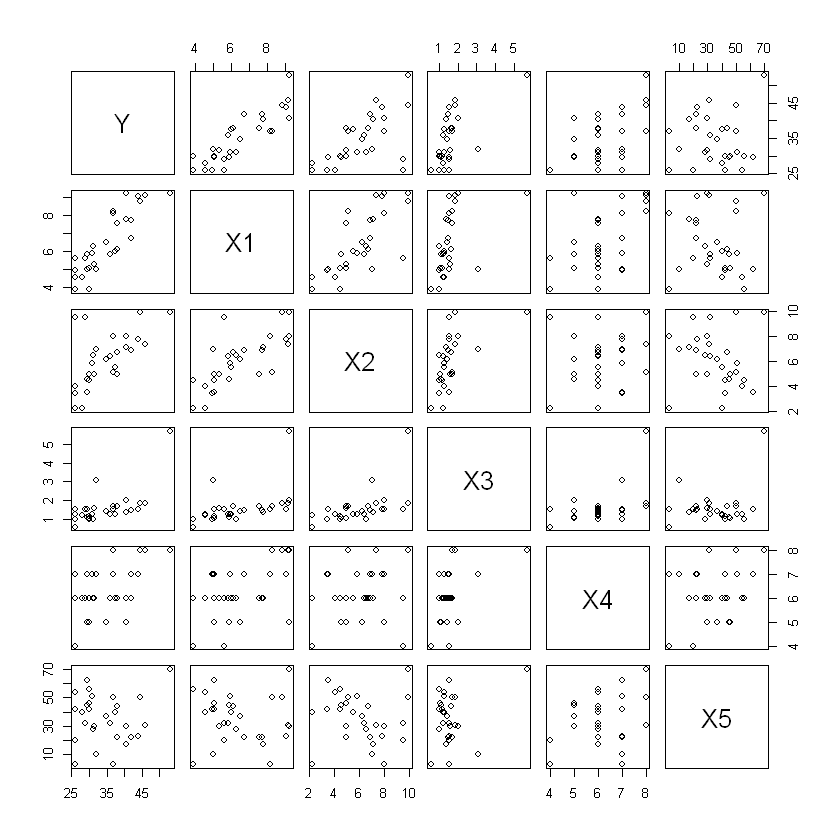

In [39]:
#MATRIZ DE CORRELACIÓN
plot(datos)

#MATRIZ DE CORRELACIONES PARA VARIABLES 
cor(datos)

Usando el metodo de la matriz de correlaciones se tienen dos procesos: 

* Graficamente, Se obtiene la imagen anterior, en la cual se requiere que los datos graficados no sigan un patron Lineal.

* Numericamente se espera que estos candidatos a tener multicolinealidad tengan un valor de $\mid x \mid > 0.5$ para confirmarlos.

Para nuestro caso, se observa que la grafica de $X_2$ vs $X_1$ presenta un patron lineal claro y es la unica que lo presenta, además en la tabla numerica se encuentra que esta tiene un valor de $0.66182194$, por lo cual se conlcuye que a partir de este metodo, son candidatos a presentar multicolinealidad leve $X_1$ y $X_2$.

Además, de la tabla numérica se observa también que la relación entre $X_2$ y $X_3$ tiene un valor de $0.5255517$ sin embargo, esta relación no es tan clara en las graficas, no obstante es posible afirmar que tambien $X_2$ y $X_3$ son candidatos a presentar multicolinealidad muy leve.



In [40]:
#misDiagnostcolin(modelo)
misDiagnostcolin(modelo,centrar=T)

DiagnÓsticos Multicolinealidad - Intercepto ajustado 
 Índices de Condición y Proporciones de Varianza 


Val.propio,cond.index,Pi.X1,Pi.X2,Pi.X3,Pi.X4,Pi.X5
2.4556085,1.000000,0.05042958,0.04621803,0.059732327,0.04922098,0.004188377
1.2743743,1.388133,0.02372335,0.05304806,0.009458495,0.06031562,0.379903545
0.6071010,2.011171,0.06516280,0.08611972,0.252010486,0.44949445,0.090786994
0.4037264,2.466244,0.15900966,0.13944643,0.541171215,0.10543962,0.519739819
0.2591898,3.078014,0.70167462,0.67516775,0.137627477,0.33552933,0.005381265


No se usará el criterio del indice de condicion ya que $\beta_0$ no tiene interpretacion practica. Siendo asi se tendra en cuenta solo la tabla del intercepto ajustado.

 * Ya que $\beta_0$ no interpretación estadistica, se debe tomar la tabla centrada
 * Se aplicara metodo de proporción de varianza, buscando dos valores mayores a 0.5 entre las variables para confirmar multicolinealidad entre ellas


Por el metodo de proporción de varianza podemos detectar multicolinealidad entre las variables X3 y X5 ya que en la cuarta fila ambas presentan una proporcion superior a 0.5, lo mismo sucede con las variables x1 y x2 en la quinta fila.


## 4. Usando el método backward determine cuales son las predictoras que deben estar en el modelo. ¿ Concuerda este modelo con el determinado en primer inciso? Además use los otros criterios vistos en clase para mostrar 2 candidatos a mejor modelo. Argumente.

regresando a la tabla de todos los modelos posibles, partiendo del modelo completo, se busca uno que al eliminar solo una variable se obtenga la menor suma cuadrada del error posible, luego se aplica la prueba de hipotesis:
$$H_0: \beta_k =0$$
$$H_1: \beta_k \neq 0$$
y se aplica la regla de decicíon:

* $F_o > F_*$ se rechaza $H_0$, donde $$F_o = \frac{SCE(MR)-SCE(MF)}{MCE(MF)}$$ 
Y $F_*$ es el valor de la tabla de Fisher con los parametros adecuados. 

In [41]:
print("valores de la tabla fisher para el analisis:")
cat("F_0.05,1,24")
qf(0.05,1,24, lower.tail = FALSE)

cat("F_0.05,1,25")
qf(0.05,1,25, lower.tail = FALSE)

cat("F_0.05,1,26")
qf(0.05,1,26, lower.tail = FALSE)

cat("F_0.05,1,27")
qf(0.05,1,27, lower.tail = FALSE)

[1] "valores de la tabla fisher para el analisis:"
F_0.05,1,24

[1] 4.259677

F_0.05,1,25

[1] 4.241699

F_0.05,1,26

[1] 4.225201

F_0.05,1,27

[1] 4.210008

Para el modelo full la suma cuadrada del error es de $SCE(MF) = 243.95$ 

* el modelo de 4 variables que reduse esta suma es el que elimina la variable $X_5$.
prueba de hipotesis:
$$H_0: \beta_5 =0$$
$$H_1: \beta_5 \neq 0$$

Regla de decision: $F_o= 2.57 x10^{-3}< F_{0.05,1,24}= 4.26$ por lo tanto no se rechaza $H_0$ y el parametro $X_5$ es eliminado del modelo.

* para la siguiente prueba se busca el modelo que reduzca la SCE para el nuevo modelo full, este será el que elimine $X_2$.

prueba de hipotesis:
$$H_0: \beta_2 =0$$
$$H_1: \beta_2 \neq 0$$

Regla de decisión: $F_0=0.074 < 4.24$ por lo tanto no se rechaza $H_0$ y el parametro $X_2$ es eliminado del modelo.

* el modelo con 2 variables será el que elimine $X_4$:
prueba de hipotesis:
$$H_0: \beta_4 =0$$
$$H_1: \beta_4 \neq 0$$

Regla de decision: $F_o= 0.9709< F_{0.05,1,26}= 4.23$ por lo tanto no se rechaza $H_0$ y el parametro $X_4$ es eliminado del modelo.

* el modelo con 1 variable será el que elimine $X_3$:
prueba de hipotesis:
$$H_0: \beta_3 =0$$
$$H_1: \beta_3 \neq 0$$

Regla de decision: $F_o= 7.75> F_{0.05,1,27}= 4.21$ por lo tanto  se rechaza $H_0$ y se finaliza el proceso.

Luego el modelo reducido será: $$Y \sim (\beta_1X_1+\beta_3X_3)$$
Efectivamente este modelo coincide con el determinado en el primer inciso.

Adicionalmente se puede hacer uso de otros criterios para determinar cual podria ser el mejor modelo,estos son respecto al $R^{2}adj$ que dice que el mejor modelo es el que tenga mayor valor en este estadistico y el Cp de Mallows que nos indica que un candidato a mejor modelo sera el que tenga el menor valor respecto a |Cp-p| (donde p=k+1).
Tomando en cuenta los criterios anteriores, se hizo uso de la tabla de todas las regresiones posibles para obtener la informacion necesaria, empezando por el $R^{2}adj$ se determino que el modelo con mayor valor en este estadistico fue el modelo de dos variables compuesto por X1 y X3 con un $R^{2}adj$=0.8063 lo cual coincide con el modelo que hemos obtenido en las pruebas anteriores reduciendo el modelo full. Respecto al Cp se encontro que el modelo con menor |Cp-p| es el modelo full que hemos venido reduciendo, ya que su Cp=6.000 se resto con k+1=6 y nos dio cero, cosa que no pasa con ningun otro modelo con menor numero de variables.

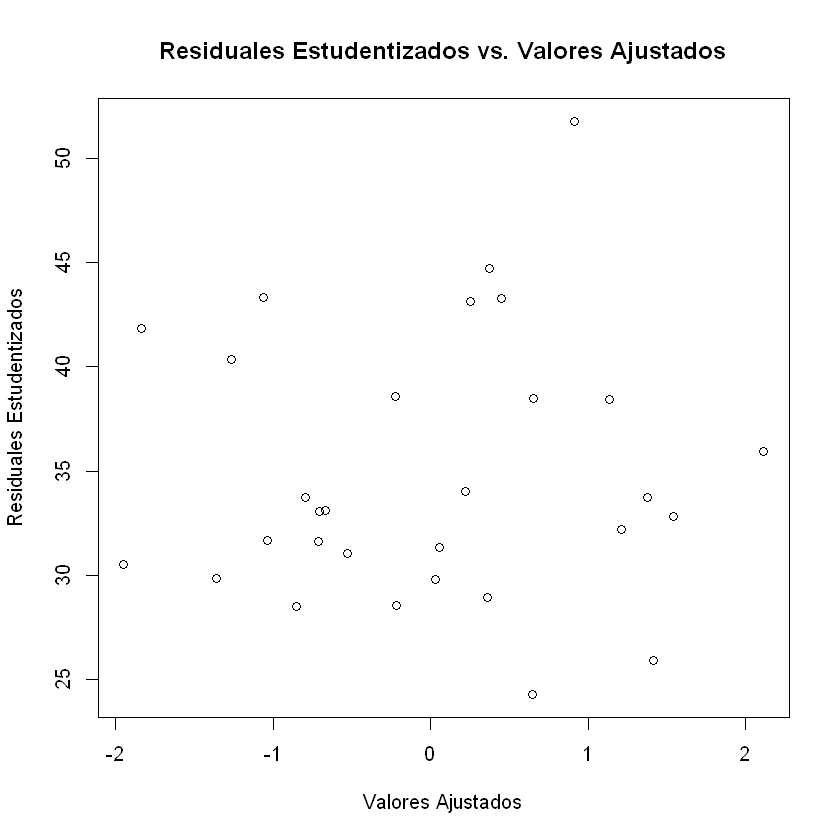

In [42]:
#CALCULO DE RESIDUALES ESTUDENTIZADOS
restud<-round(rstudent(modelo),4)

#GRÁFICO DE RESIDUALES VS. VALORES PREDICHOS
plot(restud,fitted(modelo), xlab="Valores Ajustados",ylab="Residuales Estudentizados",
     main="Residuales Estudentizados vs. Valores Ajustados")


En la prueba de varianza constante no se puede reconocer una formacion cuadrada de los datos para
poder determinar la varianza constante, en cambio adquieren una forma conica abriendo hacia 
la derecha.


	Runs Test

data:  x
Standard Normal = -1.0951, p-value = 0.2735
alternative hypothesis: two.sided


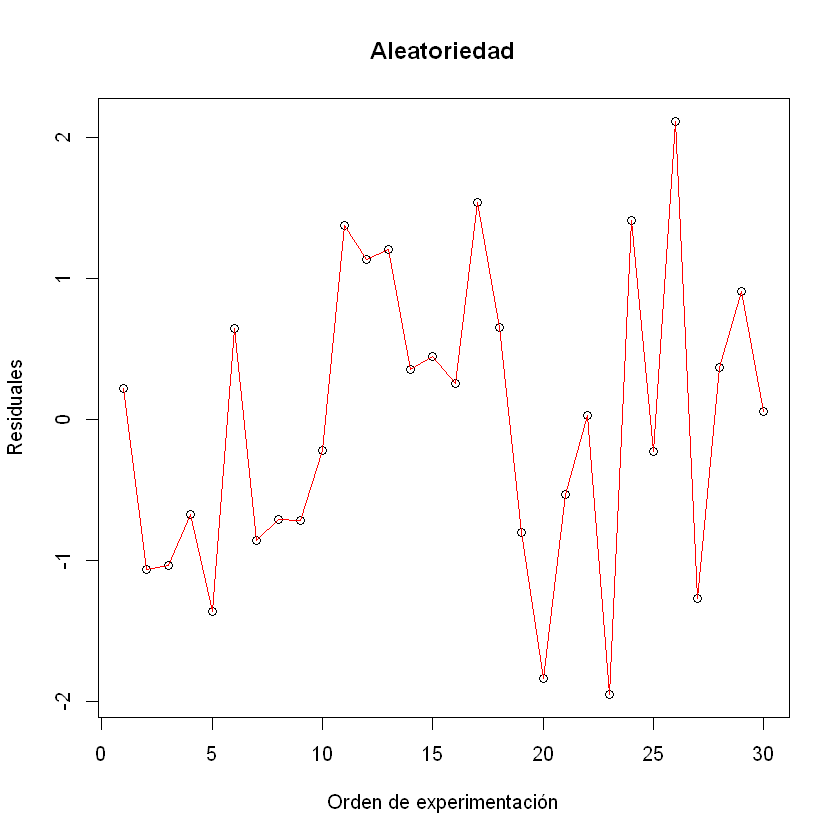

In [43]:

#prueba de aleatoriedad
plot(restud, main='Aleatoriedad', ylab='Residuales', xlab='Orden de experimentación')
lines(restud, col="red")

#test aleatoriedad
x<-factor(sign(restud))
runs.test(x)



En la prueba de aletoriedad no se presentan patrones, ni tendencias por tanto se puede concluir
que si hay aletoriedad.


	Shapiro-Wilk normality test

data:  restud
W = 0.98115, p-value = 0.8554


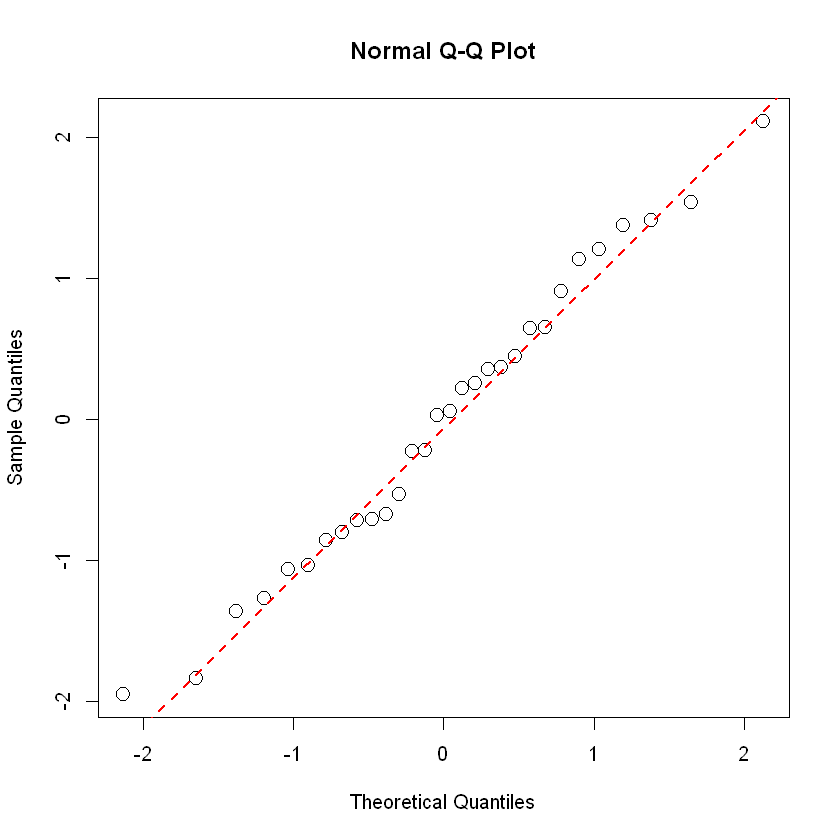

In [44]:
#PRUEBA DE NORMALIDAD DE SHAPIRO-WILK
test<-shapiro.test(restud)
test

#GRÁFICO DE CUANTILES NORMALES
qqnorm(restud,cex=1.5)
qqline(restud,lty=2,lwd=2,col=2)


Segun el plot de normalidad se puede inferir una normalidad de los datos ya que todos se acopan
a la recta a excepcion de un dato que puede poner en duda nuestra hipotesis.

In [46]:

#DIAGNÓSTICOS DE DATOS AT?PICOS, DE BALANCEO E INFLUENCIALES
t1<-predict(modelo,se.fit=T)
t2<-round(residuals(modelo),4)
t3<-round(cooks.distance(modelo),4)
t4<-round(hatvalues(modelo),4)
t5<-round(dffits(modelo),4)
data.frame(Y,yhat=t1$fit,se.yhat=t1$se.fit,residuals=t2,res.estud=restud,Cooks.D=t3,
           hii.value=t4,Dffits=t5)

Y,yhat,se.yhat,residuals,res.estud,Cooks.D,hii.value,Dffits
34.7,34.01892,1.0796592,0.6811,0.2225,0.0011,0.1147,0.0801
40.6,43.34864,1.8560166,-2.7486,-1.0632,0.0961,0.3389,-0.7612
28.9,31.65792,1.7479628,-2.7579,-1.0359,0.0766,0.3006,-0.6791
31.0,33.08735,0.8056576,-2.0874,-0.6688,0.0052,0.0639,-0.1747
25.9,29.83779,1.2289332,-3.9378,-1.3622,0.0521,0.1486,-0.5690
25.9,24.25504,1.9681233,1.6450,0.6479,0.0441,0.3811,0.5083
25.9,28.46676,1.0935725,-2.5668,-0.8522,0.0163,0.1177,-0.3112
30.9,33.05238,1.0648700,-2.1524,-0.7088,0.0107,0.1116,-0.2512
29.5,31.62316,1.2123093,-2.1232,-0.7126,0.0146,0.1446,-0.2930
27.9,28.54452,1.2982322,-0.6445,-0.2169,0.0016,0.1658,-0.0967


Segun el diagnostico de datos atipicos, de balanceo  e influenciales tenemos:

Atipicos: 5,11,12,13,17,20,23,24,26 y 27 ya que sus residuales estandarizados en valor absoluto son mayores que 3 (|di|>3).

Influenciales: 20,23,29 ya que sus |Dffits| sos mayores a 0.894427 valor obtenido de $ 2\sqrt{\frac{k+1}{n}}$

De balanceo: 19 y 20 ya que sus hii son mayores que 0.4 valor obtenido de $2\frac{k+1}{n}$

En conclucion la validez del modelo es cuestionable ya que no cumplio con todos los supuestos, como ha sido el caso de la prueba de varianza constante y tienen varios datos que afectan ciertas propiedades del modelo.